<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/LEZIONE_35_to__38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

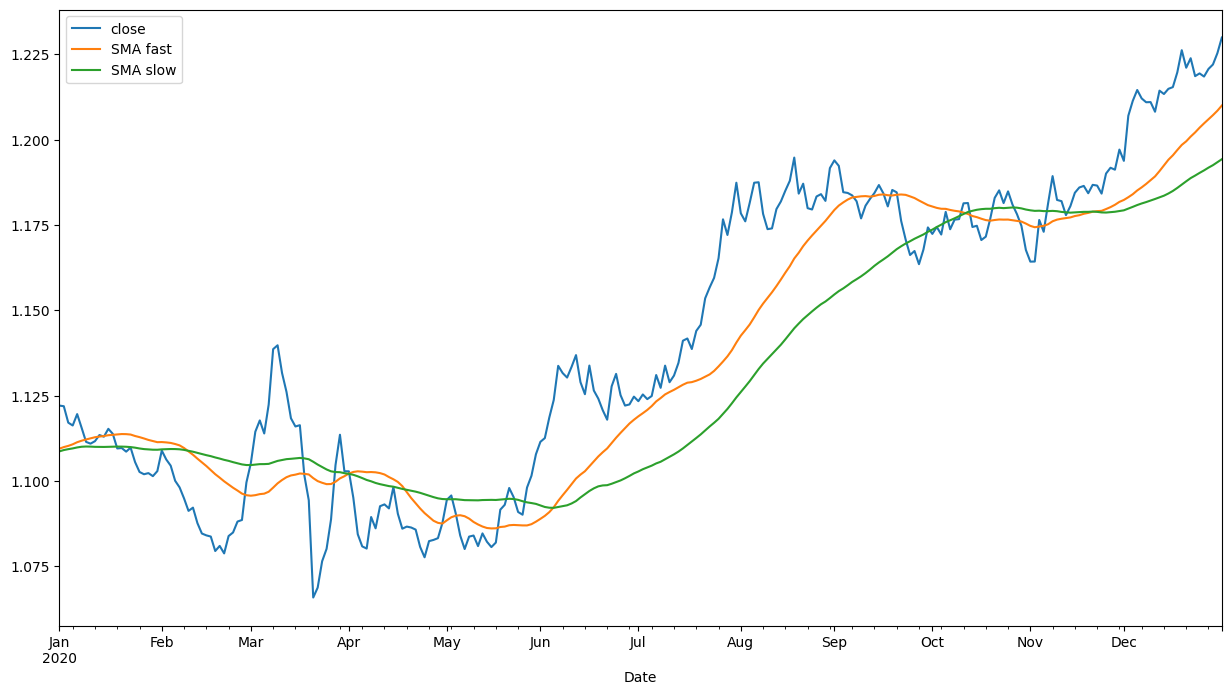

In [ ]:
#VERIFICARE LA STRATEGIA
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")
df= yf.download ("EURUSD=X")
df.columns= ["open","high","low","close","volume"]
df["SMA fast"]= df ["close"].rolling(30).mean ()
df["SMA slow"]= df ["close"].rolling(60).mean ()
df[["close","SMA fast","SMA slow"]].loc ["2020"].plot (figsize =(15,8))

In [ ]:
df["position"]= np.nan
#craere la condizione
df.loc [(df["SMA fast"]>df["SMA slow"]), "position"]= 1
df.loc [(df["SMA fast"]<df["SMA slow"]), "position"]= -1

In [ ]:
#scegliere la finestra temporale
year="2019"
#selezionare un segnale nell'indice per plottarlo
idx_open= df.loc [df["position"]==1].loc [year].index
idx_close= df.loc [df["position"]==-1].loc [year].index

In [ ]:
#dimensionare la SIZE del grafico con l'attributo figsize
plt.figure (figsize=(36,16))

<Figure size 3600x1600 with 0 Axes>

<Figure size 3600x1600 with 0 Axes>

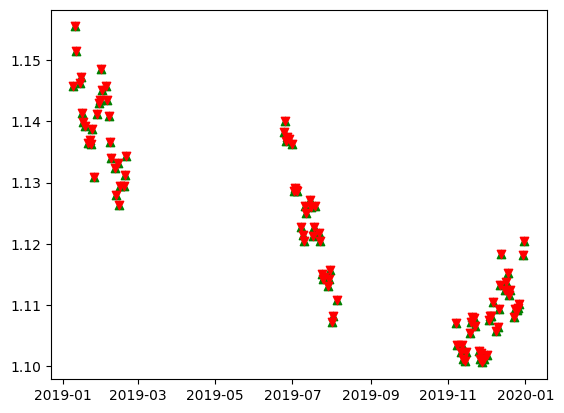

In [ ]:
#plottare i punti dell'apertura segnale BUY in verde e quelli SELL in rosso
plt. scatter (idx_open, df.loc [idx_open]["close"].loc[year],marker="^",color="green")
plt. scatter (idx_open, df.loc [idx_open]["close"].loc[year],marker="v",color="red")

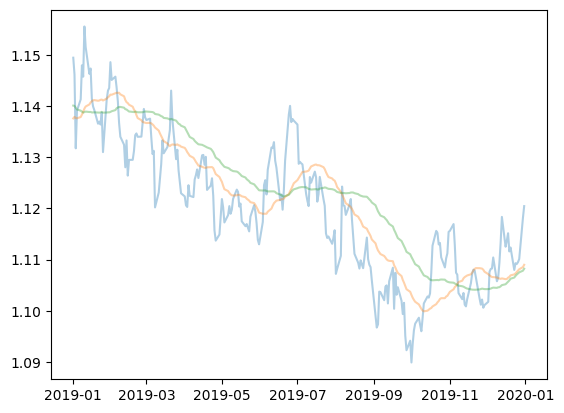

In [ ]:
#plottare anche le resistenze per essere sicuri che le condizioni siano complete
plt.plot (df["close"].loc [year].index, df["close"].loc [year], alpha= 0.35)
plt.plot (df["close"].loc [year].index, df["SMA fast"].loc [year], alpha= 0.35)
plt.plot (df["close"].loc [year].index, df["SMA slow"].loc [year], alpha= 0.35)

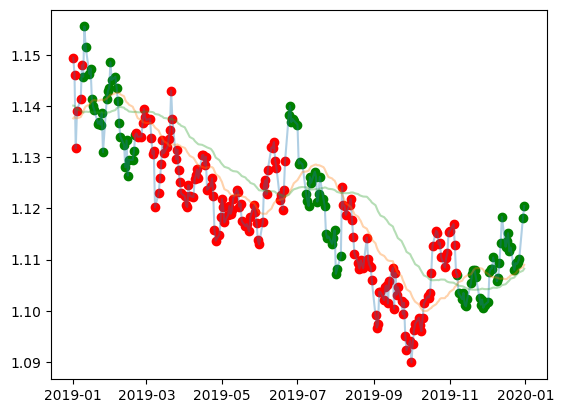

In [ ]:
plt. scatter (idx_open, df.loc [idx_open]["close"].loc[year],color="green",marker="o") # Added '#' before the hexadecimal color code
plt. scatter (idx_close, df.loc [idx_close]["close"].loc[year],color="red",marker="o")
plt.plot (df["close"].loc [year].index, df["close"].loc [year], alpha= 0.35)
plt.plot (df["close"].loc [year].index, df["SMA fast"].loc [year], alpha= 0.35)
plt.plot (df["close"].loc [year].index, df["SMA slow"].loc [year], alpha= 0.35)
plt.show ()

In [ ]:
#sinceramente il grafico non è venuto come quello mostrato nel video-corso. probabilmente ho sbagliato
#qualcosa ma non importa.
#IMPORTANTE: Studiare il codice di sviluppo dei SISTEMI DI TRADING ed imparare ogni minimo dettaglio è
#alla base del mio lavoro di TRADER SISTEMATICO E QUANTITATIVO, quindi dovrò dedicare tantissimo tempo
#alla COMPRENSIONE PROFONDA di questa parte

In [ ]:
#CORREZIONE: Ho corretto il grafico. Mi sono reso conto che nel passaggio in cui avevo definito i due IDX (Open e Close), in realtà avevo definito due volte OPEN

LEZIONE 36: Dato che in questa lezione dovremo fare il computo della strategia, ho voluto inserirla nello stesso foglio della lezione 35, per poi poter giocare con i risultati cambiando i dati di input proprio nel codice della lezione 35

In [ ]:
#Calcolare la PERCENTUALE di variazione di un asset
df ["pct"] = df ["close"].pct_change(1)
df

,open,high,low,close,volume,SMA fast,SMA slow,position,pct
Date,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,NaN,NaN,NaN,NaN
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,NaN,NaN,NaN,-0.006064
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,NaN,NaN,NaN,0.010784
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,NaN,NaN,NaN,0.002485
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,NaN,NaN,NaN,-0.003466
...,...,...,...,...,...,...,...,...,...
2025-01-17,1.030195,1.032972,1.026652,1.030195,0,1.040136,1.052851,-1.0,0.000649
2025-01-20,1.027739,1.042731,1.027939,1.027739,0,1.039109,1.051939,-1.0,-0.002384
2025-01-21,1.042068,1.043406,1.034458,1.042068,0,1.038626,1.051313,-1.0,0.013943


In [ ]:
#Calcolare il ritorno di una strategia: STEP 1
df["return"]= df ["position"].shift(1)
df


,open,high,low,close,volume,SMA fast,SMA slow,position,pct,retunr,return
Date,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,NaN,NaN,NaN,-0.006064,NaN,NaN
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,NaN,NaN,NaN,0.010784,NaN,NaN
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,NaN,NaN,NaN,0.002485,NaN,NaN
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,NaN,NaN,NaN,-0.003466,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,1.030195,1.032972,1.026652,1.030195,0,1.040136,1.052851,-1.0,0.000649,-1.0,-1.0
2025-01-20,1.027739,1.042731,1.027939,1.027739,0,1.039109,1.051939,-1.0,-0.002384,-1.0,-1.0
2025-01-21,1.042068,1.043406,1.034458,1.042068,0,1.038626,1.051313,-1.0,0.013943,-1.0,-1.0


<Axes: xlabel='Date'>

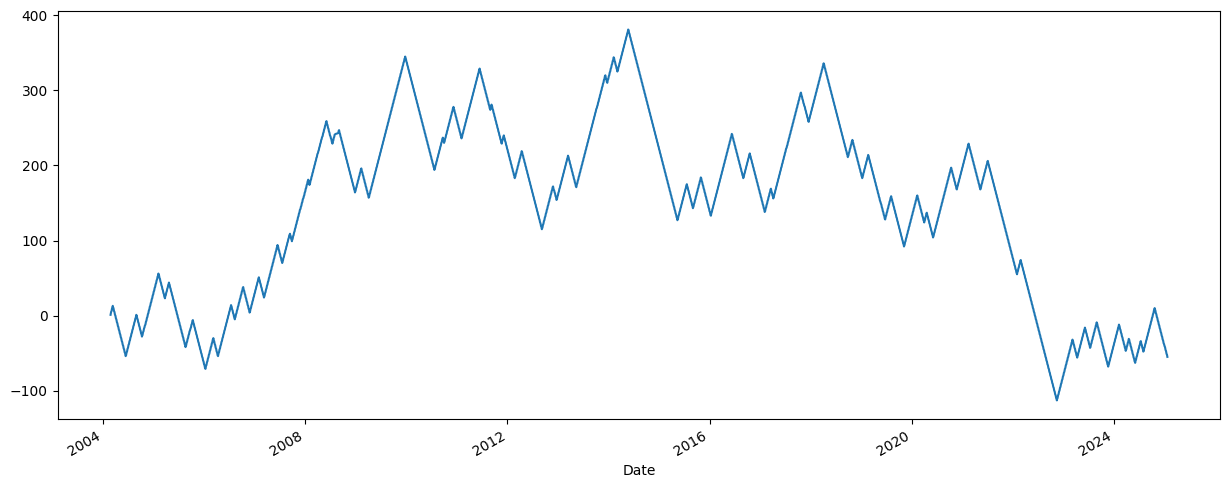

In [ ]:
#Calcolare il ritorno di una strategia: STEP 2
df ["return"].cumsum().plot (figsize=(15,6))
#Abbiamo utilizzato ilmetodo CUMSUM per sommare tutte le percentauli di vincita e perdita dei giorni presi in considerazione

LEZIONE 37: Come automatizzare la strategia

<Axes: xlabel='Date'>

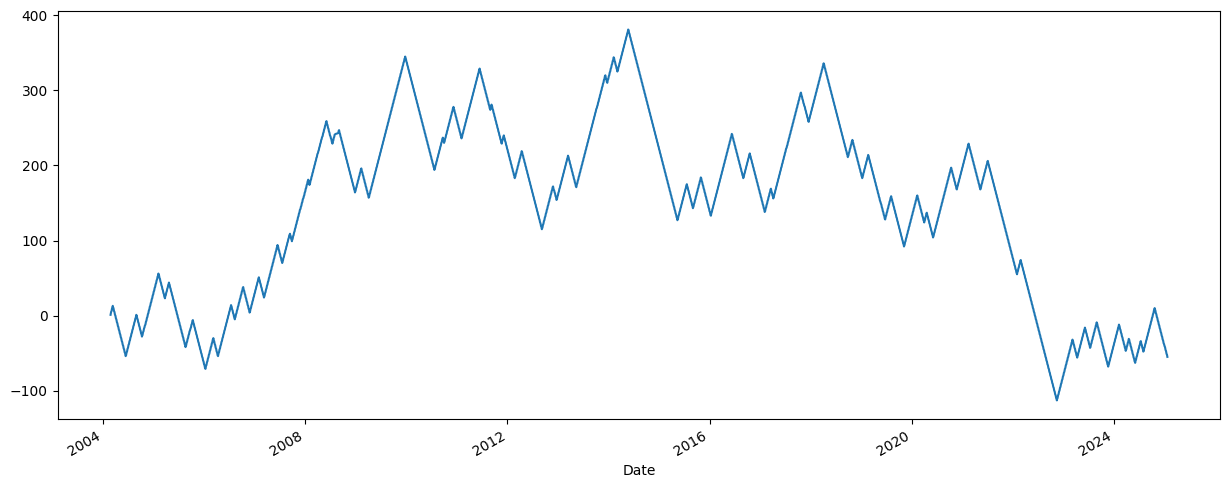

In [71]:
def SMA_strategy (input, MT5 = False, yf= False):
  if MT5:
    df = preprocessing (input)

  if yf:
    df = preprocessing_yf (input)

#Creare una resistenza utilizzando l'attributo ROLLING_MAX
df["SMA fast"]= df ["close"].rolling(30).mean ()
#Creare una resistenza utilizzando l'attributo ROLLING_MIN
df["SMA slow"]= df ["close"].rolling(60).mean ()

df ["position"]= np.nan

#Creare la condizione (stesso identico concetto già sviluppato prima con i dati MT5)
df.loc [(df["SMA fast"]>df["SMA slow"]), "position"]= 1
df.loc [(df["SMA fast"]<df["SMA slow"]), "position"]= -1

df ["pct"] = df ["close"].pct_change(1)
df ["return"].cumsum().plot (figsize=(15,6))



In [72]:
#OTTIMO: Come possiamo vedere il risultato è lo stesso grafico. In definitiva possiamo confermare che utilizzrae i dati di MT5 e quelli di YFINANCE
#hanno lo stesso OUTPUT